In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers importrt Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
file=r'C:\Users\ARUNA\Deep Learning Edvancer/Download Data/all_stocks_2006-01-01_to_2018-01-01.csv'
data=pd.read_csv(file)

In [3]:
data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [4]:
data=data[['Date','Close','Name']]


In [5]:
data

,Date,Close,Name
0,2006-01-03,79.11,MMM
1,2006-01-04,78.71,MMM
2,2006-01-05,77.99,MMM
3,2006-01-06,78.63,MMM
4,2006-01-09,79.02,MMM
...,...,...,...
93607,2017-12-22,71.58,AABA
93608,2017-12-26,69.86,AABA
93609,2017-12-27,70.06,AABA
93610,2017-12-28,69.82,AABA


In [7]:
multi_ts=data.pivot_table(columns='Name',index='Date',values='Close')

In [8]:
multi_ts.head()

Name,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,40.91,10.68,47.58,52.58,70.44,57.80,17.45,59.08,24.40,35.37,...,26.84,10.74,23.78,58.78,45.99,61.73,56.53,30.38,46.23,58.47
2006-01-04,40.97,10.71,47.25,51.95,71.17,59.27,17.85,58.91,23.99,35.32,...,26.97,10.69,24.55,58.89,46.50,61.88,56.19,31.27,46.32,58.57
2006-01-05,41.53,10.63,47.65,52.50,70.33,59.27,18.35,58.19,24.41,35.23,...,26.99,10.76,24.58,58.70,46.95,61.69,55.98,31.63,45.69,58.28
2006-01-06,43.21,10.90,47.87,52.68,69.35,60.45,18.77,59.25,24.74,35.47,...,26.91,10.72,24.85,58.64,47.21,62.90,56.16,31.35,45.88,59.43
2006-01-09,43.42,10.86,47.08,53.99,68.77,61.55,19.06,58.95,25.00,35.38,...,26.86,10.88,24.85,59.08,47.23,61.40,56.80,31.48,45.71,59.40


In [12]:
multi_ts.isna().sum()

Name
AABA     1
AAPL     1
AMZN     1
AXP      0
BA       0
CAT      0
CSCO     1
CVX      0
DIS      0
GE       0
GOOGL    1
GS       0
HD       0
IBM      0
INTC     1
JNJ      0
JPM      0
KO       0
MCD      0
MMM      0
MRK      1
MSFT     1
NKE      0
PFE      0
PG       0
TRV      0
UNH      0
UTX      0
VZ       0
WMT      0
XOM      0
dtype: int64

In [13]:
multi_ts.fillna(0,inplace=True)

In [14]:
multi_ts.columns

Index(['AABA', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GE',
       'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'WMT',
       'XOM'],
      dtype='object', name='Name')

In [15]:
scalar=MinMaxScaler(feature_range=(0,1))

In [16]:
scalar

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
multi_ts=np.array(multi_ts)

In [21]:
train_fraction=0.70

train_ts=int(len(multi_ts)*train_fraction)
test_ts=len(multi_ts)-train_ts
train_data,test_data=multi_ts[0:train_ts,],multi_ts[train_ts:len(multi_ts),]

In [22]:
train_data.shape
test_data.shape

(906, 31)

In [23]:
scalar.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
sd_train=scalar.transform(train_data)
sd_test=scalar.transform(test_data)

In [28]:
sd_train

array([[0.94219254, 0.10648056, 0.11688982, ..., 0.18383628, 0.10169492,
        0.0408251 ],
       [0.94357439, 0.10677966, 0.11607911, ..., 0.2147069 , 0.10400616,
        0.04297379],
       [0.95647167, 0.10598205, 0.11706179, ..., 0.2271939 , 0.08782743,
        0.03674259],
       ...,
       [0.80654076, 0.87467597, 0.76708021, ..., 0.855359  , 0.85618901,
        0.96153846],
       [0.80884385, 0.89112662, 0.7635917 , ..., 0.85119667, 0.8556754 ,
        0.96239794],
       [0.80101336, 0.8887338 , 0.76197027, ..., 0.855359  , 0.85413457,
        0.95595187]])

In [32]:
sd_train[0:(1),]


array([[0.94219254, 0.10648056, 0.11688982, 0.5062201 , 0.35718633,
        0.37892162, 0.51203052, 0.06786102, 0.12927366, 0.80964467,
        0.35668905, 0.39235402, 0.3580342 , 0.07163682, 0.87628513,
        0.2745707 , 0.53774629, 0.06330161, 0.02205164, 0.36914546,
        0.53891723, 0.64799614, 0.04011838, 0.57467994, 0.35411108,
        0.24591205, 0.68885519, 0.23047017, 0.18383628, 0.10169492,
        0.0408251 ]])

In [34]:
sd_train[1,]

array([0.94357439, 0.10677966, 0.11607911, 0.49868421, 0.36353361,
       0.39455493, 0.52376761, 0.06555375, 0.12325752, 0.80823463,
       0.36489275, 0.38326868, 0.34632568, 0.07087325, 0.88793694,
       0.29192547, 0.5251273 , 0.06164667, 0.02623866, 0.36518467,
       0.54517031, 0.65113472, 0.03847419, 0.61119014, 0.35677904,
       0.25400857, 0.69112964, 0.22633945, 0.2147069 , 0.10400616,
       0.04297379])

In [39]:
def create_dataset(dataset,windowsize=1):
    data_X,data_Y=[],[]
    for i in range(int(len(dataset))-windowsize):
        a=dataset[i:(i+windowsize),]
        data_X.append(a)
        data_Y.append(dataset[i+windowsize],)
    return (np.array(data_X),np.array(data_Y))

In [41]:
windowsize=10
train_X,train_Y=create_dataset(sd_train,windowsize)
test_X,test_Y=create_dataset(sd_test,windowsize)


In [42]:
train_X.shape

(2104, 10, 31)

In [43]:
test_X.shape

(896, 10, 31)

In [44]:
train_Y.shape

(2104, 31)

In [50]:
model=Sequential()
model.add(LSTM(100,input_shape=(windowsize,31)))
model.add(Dense(50))
model.add(Dense(31))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(train_X,train_Y,verbose=2,batch_size=1,epochs=3,shuffle=False)

Train on 2104 samples
Epoch 1/3
2104/2104 - 33s - loss: 0.0017
Epoch 2/3
2104/2104 - 21s - loss: 0.0020
Epoch 3/3
2104/2104 - 20s - loss: 0.0022


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               52800     
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 31)                1581      
Total params: 59,431
Trainable params: 59,431
Non-trainable params: 0
_________________________________________________________________


In [52]:
testpredict=model.predict(test_X)

In [53]:
testpredictedictedictedictedict.shape

(896, 31)

In [54]:
testpredict=scalar.inverse_transform(testpredict)
test_Y=scalar.inverse_transform(test_Y)

In [55]:
import math
test_score=mean_absolute_error(test_Y,testpredict)
test_score

34.69303488973099

In [57]:
pd.DataFrame(testpredict)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,34.003971,88.203644,295.091492,89.014275,131.927490,104.530502,24.076298,124.580132,82.159042,26.464432,...,40.057331,37.190849,28.811396,80.640953,93.636322,77.815323,114.037903,48.696491,76.916283,102.593246
1,33.983212,88.107788,294.843323,88.951401,131.822281,104.456779,24.032179,124.521004,82.101616,26.437788,...,40.030434,37.160179,28.797262,80.612961,93.590530,77.759422,113.957344,48.670681,76.868126,102.517525
2,33.968769,88.103340,294.824127,88.927986,131.797699,104.438583,24.040911,124.494522,82.081848,26.445593,...,40.012440,37.158447,28.791460,80.595108,93.562149,77.750351,113.949081,48.667400,76.865662,102.528557
3,33.977005,88.115555,294.925018,88.952042,131.801422,104.450432,24.047209,124.506073,82.092812,26.457853,...,40.019699,37.166733,28.798237,80.604027,93.579193,77.770462,113.969620,48.670326,76.873680,102.541412
4,33.984837,88.134705,294.990692,88.974319,131.822220,104.469368,24.053938,124.522667,82.107384,26.464714,...,40.028454,37.173897,28.803307,80.614380,93.595322,77.786278,113.990761,48.675053,76.883141,102.554817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,34.397182,90.912140,299.204529,90.396744,135.197174,106.294144,25.374550,126.140663,83.499962,27.002686,...,40.683777,37.890297,29.066458,81.192940,94.473610,79.048264,115.930946,49.426304,78.225365,104.687370
892,34.382900,90.871788,299.145660,90.363976,135.142761,106.259918,25.362608,126.106163,83.470467,26.998224,...,40.665630,37.879799,29.059549,81.175217,94.447693,79.026947,115.897408,49.415089,78.207237,104.664909
893,34.376266,90.849663,299.127106,90.348976,135.113464,106.241623,25.356077,126.088989,83.455482,26.996498,...,40.656673,37.874687,29.056763,81.166733,94.436401,79.017342,115.879929,49.409153,78.197876,104.652573
894,34.380070,90.862320,299.154785,90.358803,135.128998,106.252060,25.361086,126.098228,83.463905,26.999264,...,40.661415,37.878609,29.058987,81.171455,94.444168,79.024994,115.890732,49.412727,78.203972,104.661385


In [58]:
test_data.shape

(906, 31)

In [59]:
train_data.shape

(2114, 31)

In [60]:
testpredict.shape

(896, 31)

In [61]:
original=np.concatenate([train_data[:,0],test_data[0:len(testpredict),0]])

In [62]:
original

array([40.91, 40.97, 41.53, ..., 69.77, 71.24, 69.23])

In [63]:
predicted=np.concatenate([train_data[:,0],testpredict[:,0]])
predicted


array([40.91      , 40.97      , 41.53      , ..., 34.37626648,
       34.38006973, 34.38074112])

In [64]:
df=pd.DataFrame({'original':original,'fitted':predicted,'index':range(len(original))})

In [65]:
df


,original,fitted,index
0,40.91,40.910000,0
1,40.97,40.970000,1
2,41.53,41.530000,2
3,43.21,43.210000,3
4,43.42,43.420000,4
...,...,...,...
3005,71.25,34.397182,3005
3006,71.53,34.382900,3006
3007,69.77,34.376266,3007
3008,71.24,34.380070,3008


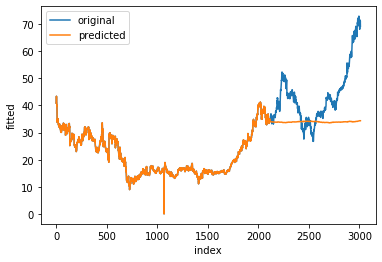

In [68]:
sns.lineplot(x=df['index'],y=df['original'],label='original')
sns.lineplot(x=df['index'],y=df['fitted'],label='predicted')